# Задание
Сгенерировать по N=1000 выборок из равномерного закона распределения на [0,1] размерами n=10^k, k=2, 2.5, 3,..., 5 элементов и по каждой из них построить:

*   оценку квантили x_{0,01}

*   оценку медианы x_{0,5}

*   оценку матожидания M

Для оценок полученных по выборкам равного размера оценить их дисперсию D^*

Построить график зависимости D* от lg n для всех оцениваемых параметров (т.е. x_0,01; x_0,5; M)

## Генерация выборк


In [ ]:
import numpy as np
import pandas as pd

N = 1000
k_values = np.arange(2, 5.5, 0.5)
n_values = 10**k_values

samples = {}

In [ ]:
for n in n_values:
  samples[n] = []
  for _ in range(N):
    sample = np.random.uniform(0, 1, int(n))
    samples[n].append(sample)

## Оценка парамеров


In [ ]:
estimates = {}

for n, sample_list in samples.items():
  estimates[n] = []
  for sample in sample_list:
    quantile_01 = np.quantile(sample, 0.01)
    median = np.median(sample)
    mean = np.mean(sample)
    estimates[n].append({'0.01 квантиль': quantile_01, 'медиана': median, 'среднее': mean})

## Дисперсия


In [ ]:
variances = {}

for n, estimate_list in estimates.items():
  estimates_df = pd.DataFrame(estimate_list)
  variances[n] = estimates_df.var().to_dict()


## Визуализация

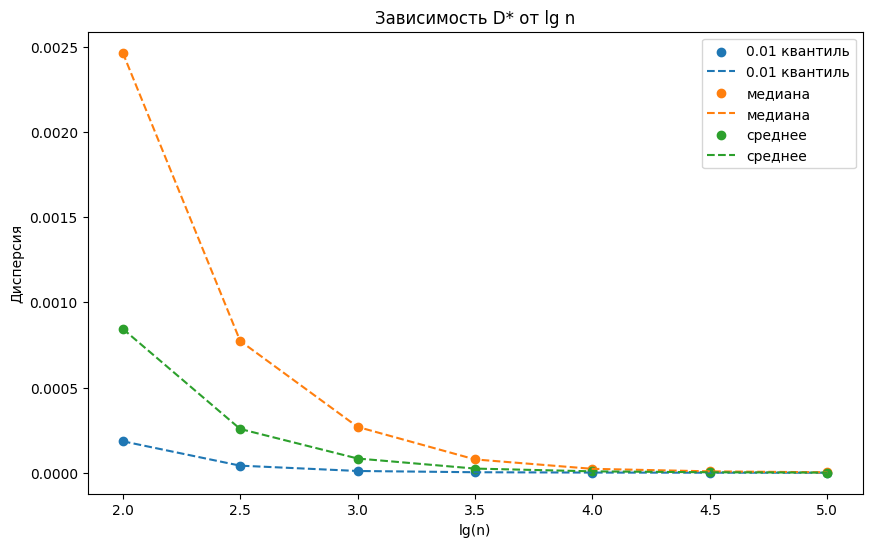

In [ ]:
import matplotlib.pyplot as plt

log10_n_values = np.log10(list(variances.keys()))

plt.figure(figsize=(10, 6))

for estimator in ['0.01 квантиль', 'медиана', 'среднее']:
  estimator_variances = [variances[n][estimator] for n in variances.keys()]
  plt.scatter(log10_n_values, estimator_variances, label=estimator)
  plt.plot(log10_n_values, estimator_variances, label=estimator, linestyle='--')

plt.xlabel('lg(n)')
plt.ylabel('Дисперсия')
plt.title('Зависимость D* от lg n')
plt.legend()
plt.show()

In [ ]:
variances = {}
second_moments = {}

for n, estimate_list in estimates.items():
    estimates_df = pd.DataFrame(estimate_list)
    # обычная несмещённая оценка дисперсии
    variances[n] = estimates_df.var().to_dict()
    second_moments[n] = (estimates_df.pow(2).mean()).to_dict()

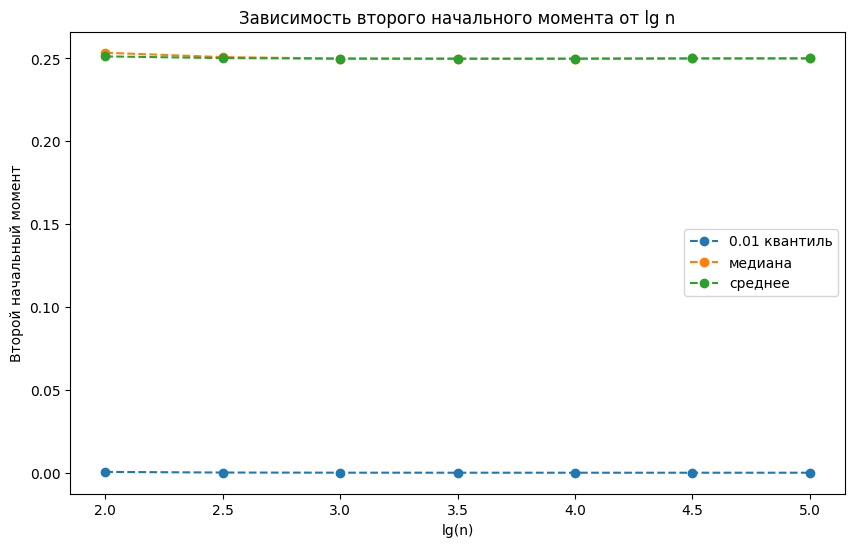

In [ ]:
log10_n_values = np.log10(list(second_moments.keys()))

plt.figure(figsize=(10,6))
# собрать значения для каждого оценщика
for estimator in ['0.01 квантиль', 'медиана', 'среднее']:
    vals = [second_moments[n][estimator] for n in second_moments.keys()]
    plt.plot(log10_n_values, vals, marker='o', linestyle='--', label=f'{estimator}')

plt.xlabel('lg(n)')
plt.ylabel('Второй начальный момент')
plt.title('Зависимость второго начального момента от lg n')
plt.legend()
plt.show()